<a href="https://colab.research.google.com/github/Saibabu22/Saibabu22/blob/Bharatintern/Copy_of_Bharat_intern_Titanic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA SCIENCE INTERNSHIP @BHARAT INTERN



###**NAME: S SAIBABU**###




# **TASK 2  : TITANIC CLASSIFICATION ( An algorithm that predicts whether a person will be saved from drowning or not. )**


## **STEPS TAKEN :**
### 1. Problem understanding and definition
### 2. Data Loading and Importing the necessary libraries
### 3. Data understanding using Exploratory Data Analysis (EDA)
### 4. Feature Engineering and Data Processing
### 5. Feature Engineering and Data Processing
### 6. Model Evaluation

#  1. Problem understanding and definition


In this challenge, we need to complete the __analysis__ of what sorts of people were most likely to __survive__. In particular,  we apply the tools of __machine learning__ to predict which passengers survived the tragedy

- Predict whether passenger will __survive or not__.

## **2 : IMPORTING LIBRARIES AND LOAD THE DATA** ##

In [ ]:
# Linear algebra
import numpy as np

# Data manipulation and analysis
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


# **2.1  Loading the data files**

Here we import the data. For this analysis, we will be exclusively working with the Training set. We will be validating based on data from the training set as well. For our final submissions, we will make predictions based on the test set.

In [ ]:
train_df = pd.read_csv('/content/taks_2 Train.csv')
test_df = pd.read_csv('/content/task_2 Test.csv')

train_df['train_test'] = 1
test_df['train_test'] = 0
# test_df['Survived'] = np.NaN
all_data = pd.concat([train_df,test_df])

%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [ ]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [ ]:
test_df.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test,relatives,not_alone,Deck,Title
0,892,3,0,22,0,0,7,Q,0,0,1,8,1
1,893,3,1,38,1,0,7,S,0,1,0,8,3
2,894,2,0,26,0,0,9,Q,0,0,1,8,1
3,895,3,0,35,0,0,8,S,0,0,1,8,1
4,896,3,1,35,1,1,12,S,0,2,0,8,3


# **2.2 About The Dataset**
The data has been split into two groups:
- training set (train.csv)
- test set (test.csv)

The training set includes passengers survival status (also know as the ground truth from the titanic tragedy) which along with other features like gender, class, fare and pclass is used to create the machine learning model.

The test set should be used to see how well the model performs on unseen data. The test set does not provide passengers survival status. We are going to use our model to predict passenger survival status.

This is clearly a <font color='red'>__Classification problem__.</font> In predictive analytics, when the <font color='red'>__target__</font> is a categorical variable, we are in a category of tasks known as <font color='red'>__classification tasks.__</font>

| Column Name          | Description                                                | Key                    |
| ---------------------| ---------------------------------------------------------- | ---------------------- |
| __PassengerId__      | Passenger Identity                                         |                        |
| __Survived__         | Whether passenger survived or not                          | 0 = No, 1 = Yes        |
| __Pclass__           | Class of ticket, a proxy for socio-economic status (SES)| 1 = 1st, 2 = 2nd, 3 = 3rd |
| __Name__             | Name of passenger                                          |                        |
| __Sex__              | Sex of passenger                                           |                        |
| __Age__              | Age of passenger in years                                  |                        |
| __SibSp__            | Number of sibling and/or spouse travelling with passenger  |                        |
| __Parch__            | Number of parent and/or children travelling with passenger |                        |
| __Ticket__           | Ticket number                                              |                        |
| __Fare__             | Price of ticket                                            |                        |
| __Cabin__            | Cabin number                                               |                        |
| __Embarked__         | Port of embarkation                                        | C = Cherbourg, Q = Queenstown, S = Southampton |

<a id="section3"></a>
## 3. Data understanding using Exploratory Data Analysis (EDA)
__Exploratory Data Analysis__ refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

In summary, it's an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  train_test   418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


#### Conclusions from .describe() method
__.describe()__ gives an understanding of the central tendencies of the numeric data.

- Above we can see that __38% out of the training-set survived the Titanic.__
- We can also see that the passenger age range from __0.4 to 80 years old.__
- We can already detect some features that contain __missing values__, like the ‘Age’ feature (714 out of 891 total).
- There's an __outlier__ for the 'Fare' price because of the differences between the 75th percentile, standard deviation, and the max value (512). We might want to drop that value.

<a id="section301"></a>
### **3.1 Exploring missing data**

In [ ]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(13)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


The __'Embarked'__ feature has only 2 missing values, which can easily be filled or dropped. It will be much more tricky to deal with the __‘Age’__ feature, which has 177 missing values. The __‘Cabin’__ feature needs further investigation, but it looks like we might want to drop it from the dataset since 77% is missing.

In [ ]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype=object)

Above we can see the 11 features and the target variable (survived). __What features could contribute to a high survival rate ?__

I believe it would make sense if everything except ‘PassengerId’, ‘Name’ and ‘Ticket’ would be high correlated with survival rate.

<a id="section302"></a>
### **3.2 Dealing with the outlier**

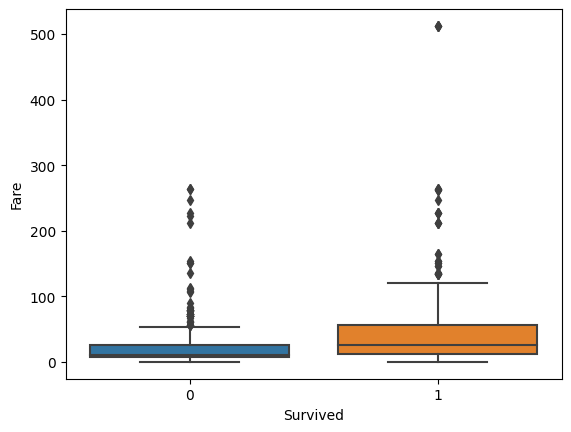

In [ ]:
sns.boxplot(x='Survived',y='Fare',data=train_df);

#Passengers who paid over 300

In [ ]:
train_df[train_df['Fare']>300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1


#Drop the outliers

It might be beneficial to drop those outliers for the model. Further investigation needs to be done.

#@train_df[train_df['Fare']>300]

In [ ]:
train_df[train_df['Name'].str.contains("Capt")]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,1


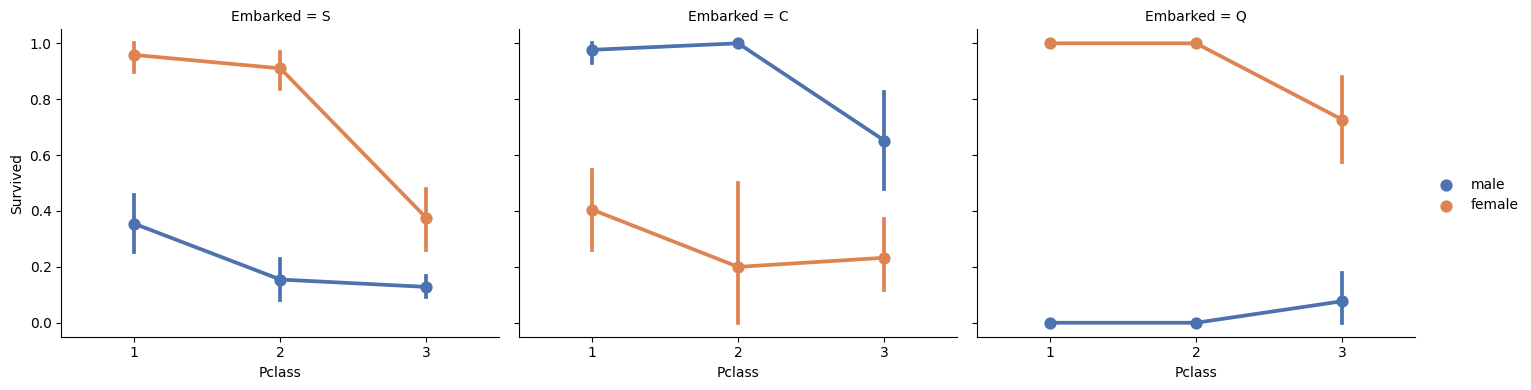

In [ ]:
FacetGrid = sns.FacetGrid(train_df, col='Embarked', height=4, aspect=1.2)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette='deep', order=None, hue_order=None)
FacetGrid.add_legend();

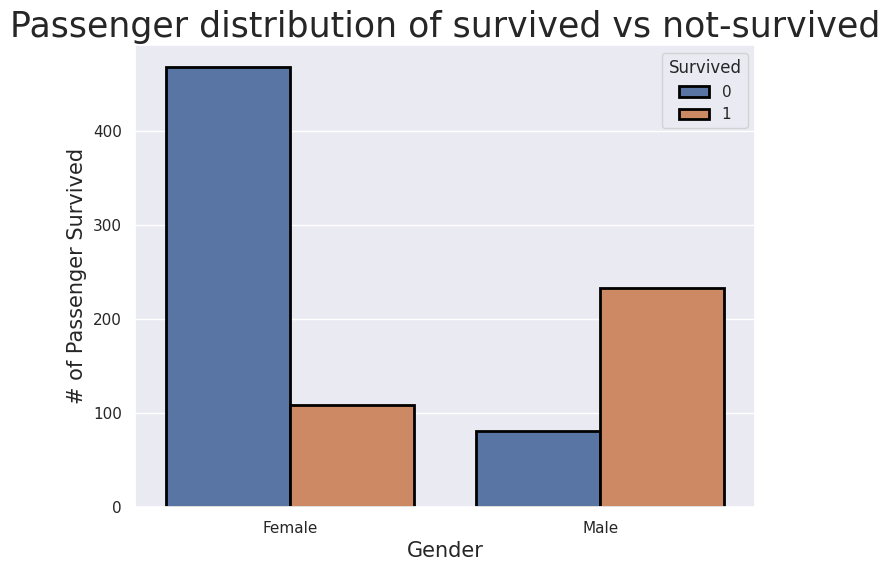

In [ ]:
sns.set(style='darkgrid')
plt.subplots(figsize = (8,6))
ax=sns.countplot(x='Sex', data = train_df, hue='Survived', edgecolor=(0,0,0), linewidth=2)

# Fixing title, xlabel and ylabel
plt.title('Passenger distribution of survived vs not-survived', fontsize=25)
plt.xlabel('Gender', fontsize=15)
plt.ylabel("# of Passenger Survived", fontsize = 15)
labels = ['Female', 'Male']

# Fixing xticks.
plt.xticks(sorted(train_df.Survived.unique()),labels);

In [ ]:
train_df.groupby(['Sex']).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
Sex,,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,1.0
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,1.0


In [ ]:
train_df.groupby(['Sex','Pclass']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        469.212766  0.968085  34.611765  0.553191  0.457447   
       2        443.105263  0.921053  28.722973  0.486842  0.605263   
       3        399.729167  0.500000  21.750000  0.895833  0.798611   
male   1        455.729508  0.368852  41.281386  0.311475  0.278689   
       2        447.962963  0.157407  30.740707  0.342593  0.222222   
       3        455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  train_test  
Sex    Pclass                          
female 1       106.125798         1.0  
       2        21.970121         1.0  
       3        16.118810         1.0  
male   1        67.226127         1.0  
       2        19.741782         1.0  
       3        12.661633         1.0

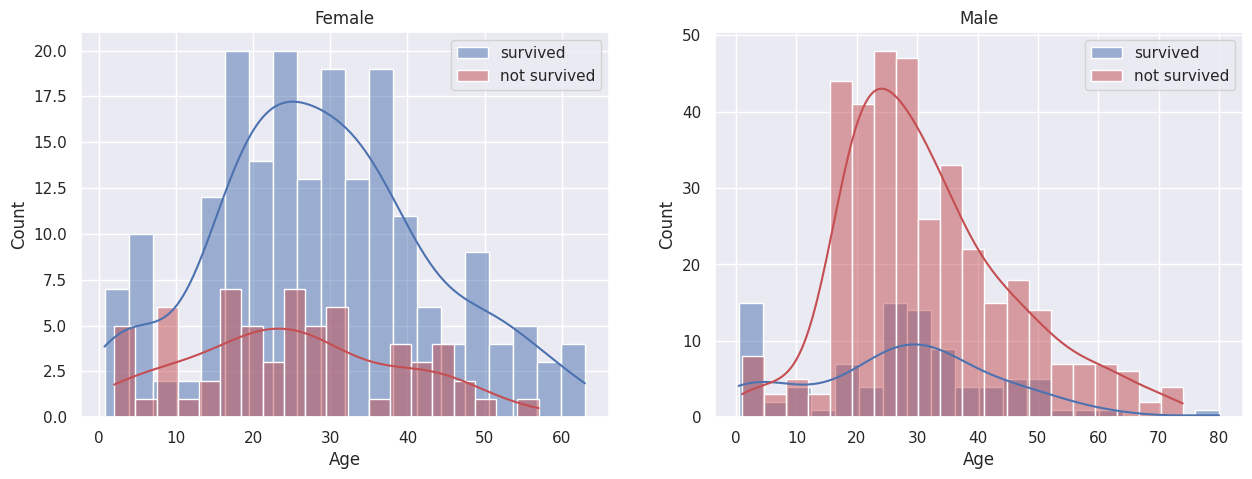

In [ ]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']

# Plot Female Survived vs Not-Survived distribution
ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[0],color='b', kde=True)
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=20, label = not_survived, ax = axes[0],color='r', kde=True)
ax.legend()
ax.set_title('Female')

# Plot Male Survived vs Not-Survived distribution
ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[1],color='b', kde=True)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=20, label = not_survived, ax = axes[1],color='r', kde=True)
ax.legend()
ax.set_title('Male');

In [ ]:
train_df[train_df['Age']<18].groupby(['Sex','Pclass']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        525.375000  0.875000  14.125000  0.500000  0.875000   
       2        369.250000  1.000000   8.333333  0.583333  1.083333   
       3        374.942857  0.542857   8.428571  1.571429  1.057143   
male   1        526.500000  1.000000   8.230000  0.500000  2.000000   
       2        527.818182  0.818182   4.757273  0.727273  1.000000   
       3        437.953488  0.232558   9.963256  2.069767  1.000000   

                     Fare  train_test  
Sex    Pclass                          
female 1       104.083337         1.0  
       2        26.241667         1.0  
       3        18.727977         1.0  
male   1       116.072900         1.0  
       2        25.659473         1.0  
       3        22.752523         1.0

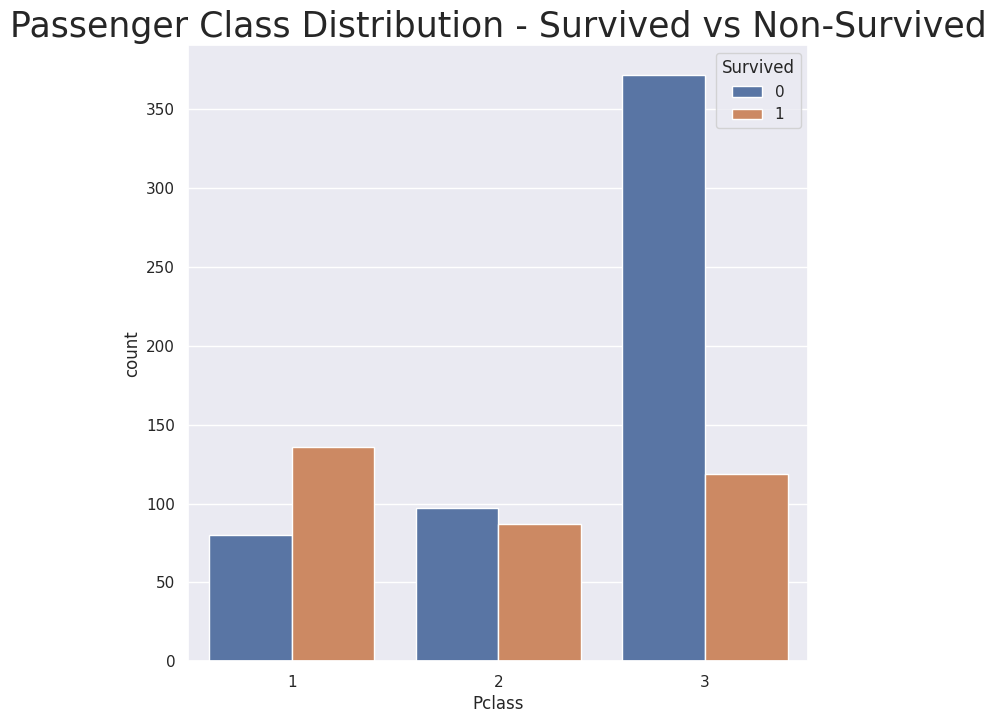

In [ ]:
plt.subplots(figsize = (8,8))
ax=sns.countplot(x='Pclass',hue='Survived',data=train_df)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25);

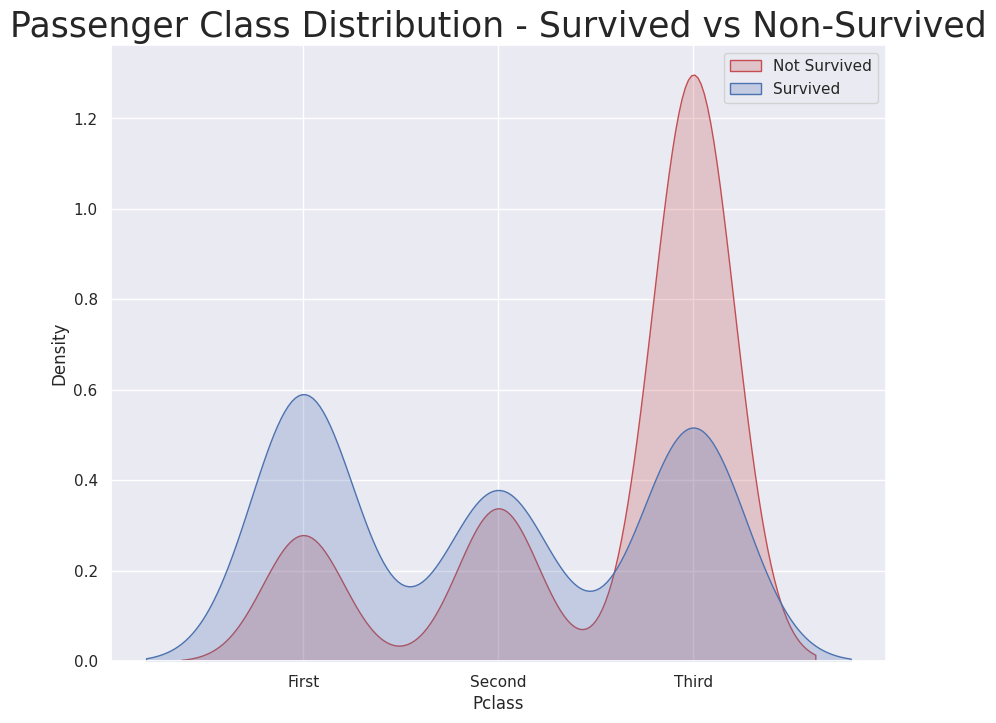

In [ ]:
plt.subplots(figsize=(10,8))
ax=sns.kdeplot(train_df.loc[(train_df['Survived'] == 0),'Pclass'],shade=True,color='r',label='Not Survived')
ax.legend()
ax=sns.kdeplot(train_df.loc[(train_df['Survived'] == 1),'Pclass'],shade=True,color='b',label='Survived')
ax.legend()

plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25)
labels = ['First', 'Second', 'Third']
plt.xticks(sorted(train_df.Pclass.unique()),labels);

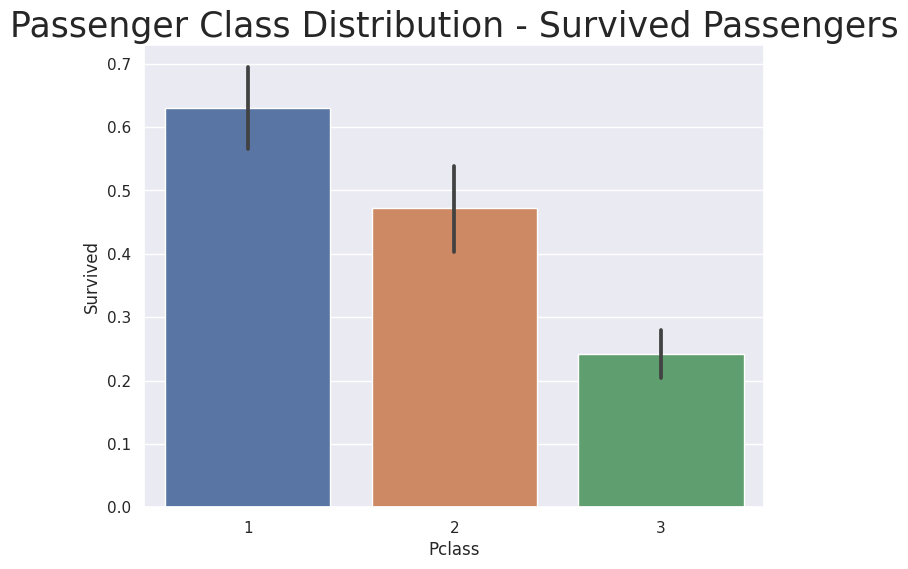

In [ ]:
plt.subplots(figsize = (8,6))
sns.barplot(x='Pclass', y='Survived', data=train_df);
plt.title("Passenger Class Distribution - Survived Passengers", fontsize = 25);

In [ ]:
# Look at numeric and categorical values separately
df_num = train_df[['Age','SibSp','Parch','Fare']]
df_cat = train_df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

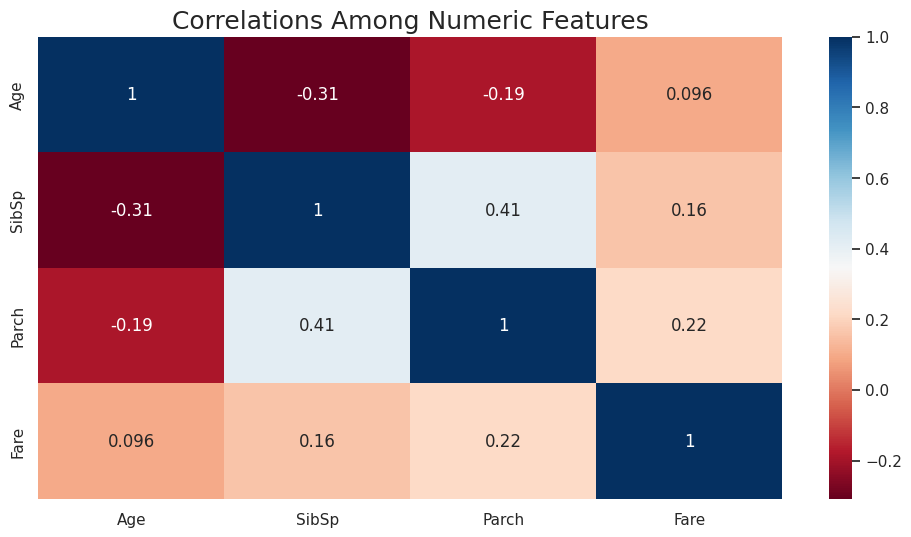

In [ ]:
plt.subplots(figsize = (12,6))
sns.heatmap(df_num.corr(), annot=True,cmap="RdBu")
plt.title("Correlations Among Numeric Features", fontsize = 18);

In [ ]:
train_df = train_df.drop(['PassengerId'], axis=1)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [ ]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

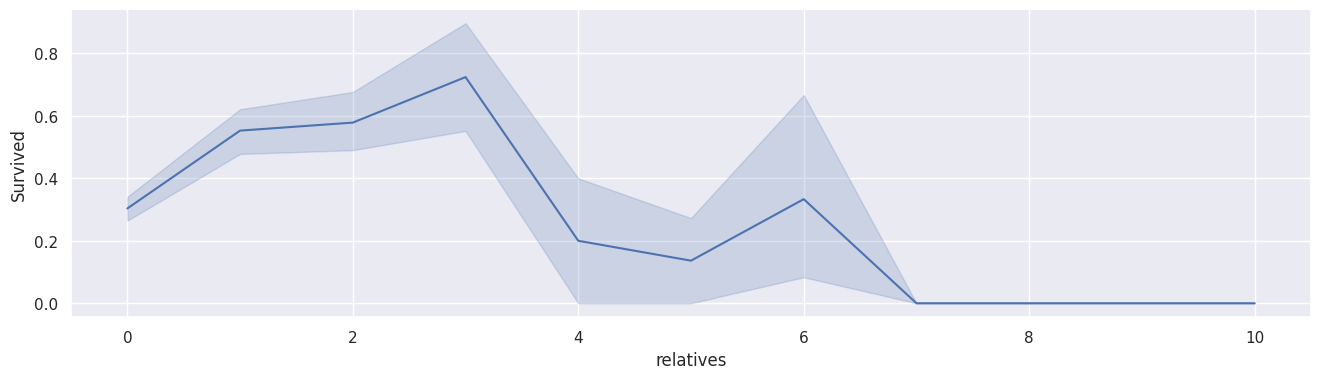

In [ ]:
plt.subplots(figsize = (16,4))
ax = sns.lineplot(x='relatives',y='Survived', data=train_df)

In [ ]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

In [ ]:
# We can now drop the Cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [ ]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()

    # Compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)

    # Fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

In [ ]:
train_df["Age"].isnull().sum()

0

In [ ]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [ ]:
train_df['Embarked'].isnull().sum()

0

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Sex         891 non-null    object 
 4   Age         891 non-null    int64  
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   Ticket      891 non-null    object 
 8   Fare        891 non-null    float64
 9   Embarked    891 non-null    object 
 10  train_test  891 non-null    int64  
 11  relatives   891 non-null    int64  
 12  not_alone   891 non-null    int64  
 13  Deck        891 non-null    int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 97.6+ KB


In [ ]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Survived    891 non-null    int64 
 1   Pclass      891 non-null    int64 
 2   Name        891 non-null    object
 3   Sex         891 non-null    object
 4   Age         891 non-null    int64 
 5   SibSp       891 non-null    int64 
 6   Parch       891 non-null    int64 
 7   Ticket      891 non-null    object
 8   Fare        891 non-null    int64 
 9   Embarked    891 non-null    object
 10  train_test  891 non-null    int64 
 11  relatives   891 non-null    int64 
 12  not_alone   891 non-null    int64 
 13  Deck        891 non-null    int64 
dtypes: int64(10), object(4)
memory usage: 97.6+ KB


In [ ]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}

for dataset in data:
    # Extract titles
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)

    # Replace titles with a more common title or as Other
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

    # Convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)

    # Filling NaN with 0 just to be safe
    dataset['Title'] = dataset['Title'].fillna(0)

In [ ]:
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [ ]:
# Checking results
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,train_test,relatives,not_alone,Deck,Title
0,0,3,male,22,1,0,A/5 21171,7,S,1,1,0,8,1
1,1,1,female,38,1,0,PC 17599,71,C,1,1,0,3,3
2,1,3,female,26,0,0,STON/O2. 3101282,7,S,1,0,1,8,2
3,1,1,female,35,1,0,113803,53,S,1,1,0,3,3
4,0,3,male,35,0,0,373450,8,S,1,0,1,8,1


In [ ]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,train_test,relatives,not_alone,Deck,Title
0,0,3,0,22,1,0,A/5 21171,7,S,1,1,0,8,1
1,1,1,1,38,1,0,PC 17599,71,C,1,1,0,3,3
2,1,3,1,26,0,0,STON/O2. 3101282,7,S,1,0,1,8,2
3,1,1,1,35,1,0,113803,53,S,1,1,0,3,3
4,0,3,0,35,0,0,373450,8,S,1,0,1,8,1


In [ ]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [ ]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test,relatives,not_alone,Deck,Title
0,0,3,0,22,1,0,7,S,1,1,0,8,1
1,1,1,1,38,1,0,71,C,1,1,0,3,3
2,1,3,1,26,0,0,7,S,1,0,1,8,2
3,1,1,1,35,1,0,53,S,1,1,0,3,3
4,0,3,0,35,0,0,8,S,1,0,1,8,1
